# pyICON.view for NextGems with xarray/dask support

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
import xarray as xr
import sys

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [4]:
# so far pyicon_view_xr is not part of the main library, therefore use the following to load it
sys.path.append('/home/mpim/m300602/pyicon/pyicon/view/')
import pyicon_view_xr as view

## Specify data set

Define a dataset with giving the path to the data and information about the triangular grid and the regular grid. The regular grid needs to be created in advance (use pyic.calc_ckdtree for that).

In [83]:
run = 'dpp0016'
runname = ''
gname = 'r2b9_atm_r0015'
path_data = f'/work/mh0287/k203123/GIT/icon-aes-dyw_albW/experiments/{run}/'

In [84]:
mfdset_kwargs = dict(combine='nested', concat_dim='time', 
                     data_vars='minimal', coords='minimal', compat='override', join='override',
                     parallel=True,
                    )

In [85]:
%%time
ds = xr.open_mfdataset(f'{path_data}/{run}_atm3_2d_ml_????????????????.nc', **mfdset_kwargs,
                  chunks=dict(time=1))

CPU times: user 701 ms, sys: 713 ms, total: 1.41 s
Wall time: 1.46 s


## Update xarray object

In [86]:
ds['ke'] = 0.5*(ds['uas']**2+ds['vas']**2)
ds['ke'] = ds['ke'].assign_attrs({'long_name': 'kinetic energy', 'units': 'm^2/s^2'})

In [87]:
list(ds.keys())

['uas', 'vas', 'tas', 'ke']

## Interactive plot

<IPython.core.display.Javascript object>


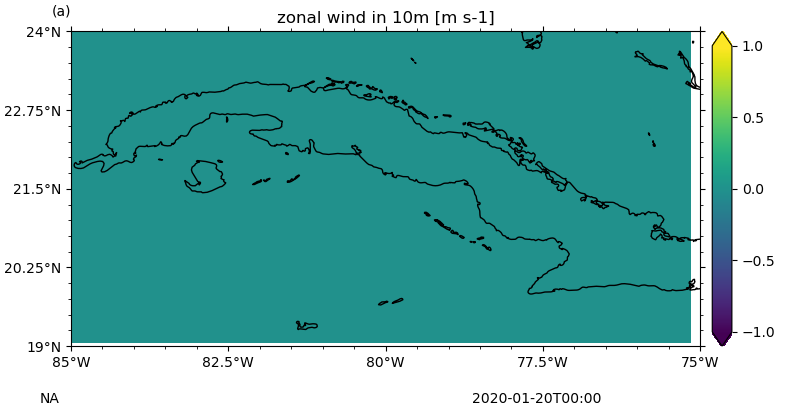

Output()

In [88]:
PyicV = view.hplot(ds, 
                   lon_reg=[-85,-75], lat_reg=[19,24], # comment this line to get global plot (be careful his tgrid)
                   land_facecolor='none', # comment this line and get land masses filled
#                    logplot=True, # maybe you want to use this for plotting ke
                  )